# Introduction

## Sampling uniformly with n-dimensional unit circles/spheres

In [1]:
using Distributions
using Plots;
pyplot();  # Plots backend

In /home/pprao/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/pprao/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/pprao/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/pprao/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/pprao/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

Below we sample uniformly within the 2 and 3-dimensional unit circles/spheres. We consider neighbourhoods centered at the origin and the proportion of samples that lie within the neighbourhood.

In [2]:
# source: https://discourse.julialang.org/t/plot-a-circle-with-a-given-radius-with-plots-jl/23295/4
function circle(r, n)
    θ = range(0, stop = 2π, length = n)
    x = r * sin.(θ)
    y = r * cos.(θ)
    return x, y
end

circle (generic function with 1 method)

In [3]:
function random_sample(n)
    θ = rand(Uniform(0, 2*π), n)
    u = rand(Uniform(0, 1), n)
    x = sqrt.(u) .* cos.(θ)
    y = sqrt.(u) .* sin.(θ)
    return x, y
end

random_sample (generic function with 1 method)

### Plot unit circle in $R^2$ (centered at the origin)
The random samples are contained within this unit circle.

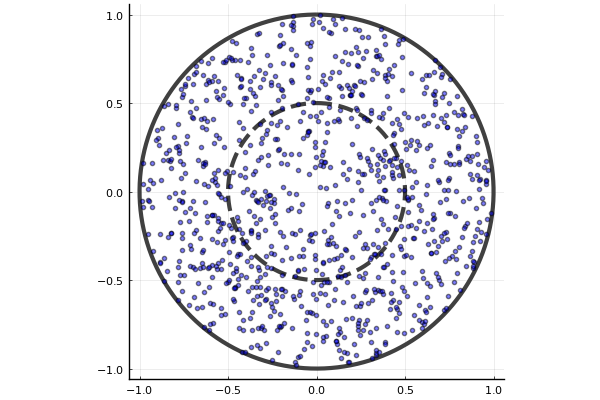

In [4]:
# Select colors using this swatch:
# http://juliagraphics.github.io/Colors.jl/dev/namedcolors/
plot_1 = plot(
    circle(1, 500), seriestype = :shape, lw = 3,
    linecolor = :grey25, legend = false, color = nothing,
    aspect_ratio = 1,
)
# Half-unit circle
plot!(
    circle(0.5, 500), seriestype = :shape, lw = 3, 
    linecolor = :grey25, linestyle = :dash, legend = false, 
    color = nothing, aspect_ratio = 1,
)
# Scatter points of random samples (2D)
plot!(
    random_sample(1000), seriestype = :scatter, alpha = 0.5,
    markersize = 3, markercolor = :blue,
)

### Plot unit sphere in $R^3$ (centered at the origin)

In [5]:
# Formula for cartesian coordinates of a sphere from spherical coordinates
# r = radius, ϕ = azimuth, θ = inclination

function sphere(r, n)
    ϕ = range(0, stop = 2π, length = n)
    θ = range(0, stop = π, length = n)
    x = r * cos.(ϕ) .* sin.(θ)
    y = r * sin.(ϕ) .* sin.(θ)
    z = r * cos.(θ)
    return x, y, z
end

sphere (generic function with 1 method)

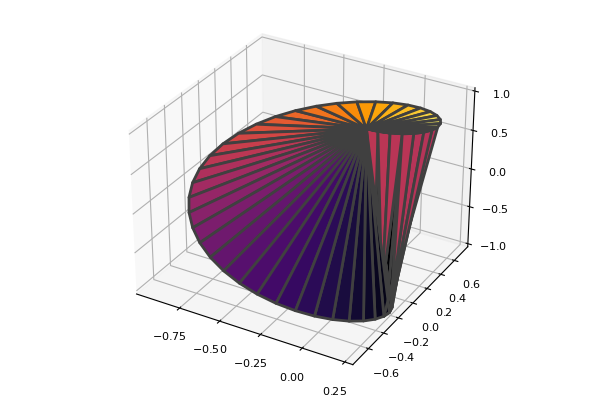

In [6]:
plot_2 = plot(
    sphere(1, 50), seriestype = :wireframe, lw = 2,
    linecolor = :grey25, legend = false,
)